In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import ttest_1samp, t

#### Simple usage of One-Sample T-Test
We use a one sample T-test to determine whether our sample mean (observed average) is statistically significantly different to the population mean (expected average).

$$\Large t = \dfrac{\bar{x} – \mu}{SE}$$

Let’s say we want to calculate the resting systolic blood pressure of 20 first-year resident female doctors and compare it to the general public population mean of 120 mmHg.

The `null hypothesis` is that there is no significant difference between the blood pressure of the resident female doctors and the general population.

__Step 1__
$H_0$ : the `null hypothesis` is the mean of the sample is equal to the common belief, $\mu = 120$

$H_a$ : the `alternate hypothesis` is the mean of the sample is NOT equal to the common belief, $\mu != 120$

__Step 2__
- conduct the statistical test
- we get the probability value from the test (p-value)
- if this p-value LESS than 0.05 (5%) 
    - reject the $H_0$

In [3]:
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

In [4]:
# Known population mean
pop_mean = 120

In [5]:
# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(female_doctor_bps, pop_mean)

In [6]:
t_statistic, p_value

(4.512403659336718, 0.00023838063630967753)

In [7]:
# Set significance level
alpha = 0.05

In [8]:
# Calculate critical value for two-tailed test
df             = len(female_doctor_bps) - 1  # degrees of freedom
critical_value = t.ppf(1 - alpha / 2, df)
critical_value

2.093024054408263

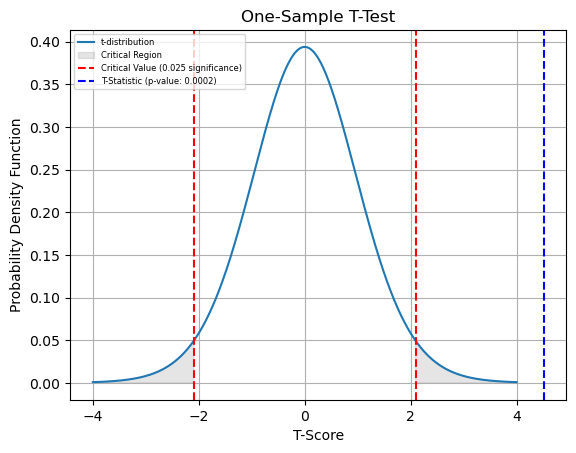

In [9]:
# Plot the t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)
plt.plot(x, y, label='t-distribution')

# Shade the area for the critical region
plt.fill_between(x, y, where=(x > critical_value) | (x < -critical_value), color='gray', alpha=0.2, label='Critical Region')

# Plot vertical lines for critical value and t-statistic
plt.axvline(critical_value,  color='red',  linestyle='--', label=f'Critical Value ({alpha/2} significance)')
plt.axvline(-critical_value, color='red',  linestyle='--')
plt.axvline(t_statistic,     color='blue', linestyle='--', label=f'T-Statistic (p-value: {p_value:.4f})')

# Set plot parameters
plt.title('One-Sample T-Test')
plt.xlabel('T-Score')
plt.ylabel('Probability Density Function')
plt.legend(loc='upper left', fontsize=6)
plt.grid(True)